In [1]:
!pip install qiskit qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.5 MB/s eta 0:00:00


In [2]:
# Qiskit 2.x Example – OpenQASM Demonstration

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3  # For OpenQASM 3 export

In [3]:
# Create a simple 2-qubit quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

In [4]:
print("Quantum Circuit:")
print(qc.draw())

Quantum Circuit:
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


In [5]:
# Convert the circuit to OpenQASM 3 format
qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)


Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[2] meas;
qubit[2] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
meas[0] = measure q[0];
meas[1] = measure q[1];



In [6]:
# Optional: Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
print("\nSimulation Result:")
print(counts)


Simulation Result:
{'11': 503, '00': 521}


Task 1: Modify the circuit to have 3 qubits and apply a different gate sequence.

In [17]:
from qiskit import QuantumCircuit

# Create a 3-qubit quantum circuit
qc = QuantumCircuit(3)

# New gate sequence
qc.h(0)           # Hadamard on qubit 0
qc.cx(0, 1)       # CNOT from q0 to q1
qc.x(2)           # Pauli-X on q2
qc.cz(1, 2)       # Controlled-Z from q1 to q2

# Add measurements
qc.measure_all()

# Display circuit
qc.draw()

┌───┐         ░ ┌─┐      
   q_0: ┤ H ├──■──────░─┤M├──────
        └───┘┌─┴─┐    ░ └╥┘┌─┐   
   q_1: ─────┤ X ├─■──░──╫─┤M├───
        ┌───┐└───┘ │  ░  ║ └╥┘┌─┐
   q_2: ┤ X ├──────■──░──╫──╫─┤M├
        └───┘         ░  ║  ║ └╥┘
meas: 3/═════════════════╩══╩══╩═
                         0  1  2

Task 2: Generate and display the QASM code for the new circuit.

In [9]:
# Convert the circuit to OpenQASM 3 format
qasm_code = qasm3.dumps(qc)
print("\nGenerated OpenQASM 3 Code:\n")
print(qasm_code)


Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
qubit[3] q;
h q[0];
cx q[0], q[1];
x q[2];
cz q[1], q[2];



Task 3: Identify how Hadamard and CNOT operations are represented in QASM syntax.

How hadamard represented:
  h q[0]

---

How CNOT represented:
  cx q[0], q[1]

Task 4: Add a barrier and observe how it appears in the QASM code.

In [13]:
# Add barrier between operations
qc.barrier()

# Add some operations after the barrier
qc.h(2)
qc.cx(2, 0)

# Show updated QASM
qasm_code = qasm3.dumps(qc)
print("\nUpdated OpenQASM 3 Code:\n")
print(qasm_code)


Updated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
qubit[3] q;
h q[0];
cx q[0], q[1];
x q[2];
cz q[1], q[2];
barrier q[0], q[1], q[2];
h q[2];
cx q[2], q[0];
barrier q[0], q[1], q[2];
h q[2];
cx q[2], q[0];



Task 5: Run the modified circuit and compare simulation results.

{'100': 491, '111': 533}


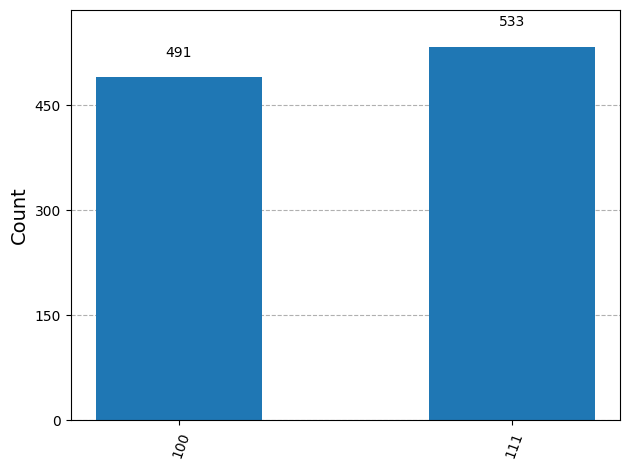

In [18]:
# Use Qiskit's Aer simulator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import transpile

simulator = AerSimulator()

compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# Display output counts
print(counts)
plot_histogram(counts)